Matching hankel function to solution to scrodinger equation

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from scipy.special import spherical_jn, spherical_yn
from scipy.special import spherical_jn, spherical_yn
from scipy.special import spherical_in, spherical_kn

Defining hankel functions for solutions outside muffin tin 

$$ u(r)=-i^{l+1}\,r\,h_l(\kappa r) $$


define derivative of $ u(r)$ 

$$ \frac{du}{dr}=-i^{l+1}\left(h_l(\kappa r)+r\,\frac{dh_l(\kappa r)}{dr}\right)$$

In [87]:


def spherical_hankel(l, r,k):

    h = spherical_kn(l, k * r)*r
    dh_dx = spherical_kn(l, k * r,derivative = True)*k*r

    dh = (h/r + dh_dx)
    return h, dh


define potential function and Schrodinger ODE. 

 $$ \left[\frac{h^2}{2m}\frac{d^2}{dr^2}+\left(E-V(r)-\frac{\hbar^2l(l+1)}{2mr^2}\right)\right]u_l(r)=0 $$

 solve in Rydburg units $\frac{\hbar^2}{4m} = 1 \rm {Ry}$

 $$-\,\frac{d^2 u(r)}{dr^2} \;+\; \biggl[ \frac{l(l+1)}{r^2} \;-\;\frac{2Z}{r}\biggr] \,u(r)\;=\;E\,u(r)\,. $$



In [88]:
def potential(r,R):
    """
    Coulomb potential but it can be whatever
    """

    return -2.0 / r 




In [89]:
def schrod_ode(r, y, E, l,R):
    """
    second order ode to first order
    """
    u, up = y
    
    
    # V = -2.0 / r + 2.0 / R

    V= potential(r,R)

    return [up,(l * (l + 1) / r**2 +V- E) * u]

def schrod_int(E, l, boundary_conditions, r_min, R, num_points=100000):
    # E=-.11101
    print('startschrod')
    r_values = np.linspace(r_min, R, num_points)
    # r_values=np.logspace(-6,.6, 100000)
    sol = solve_ivp(schrod_ode,(r_min, R),boundary_conditions,method='DOP853',t_eval=r_values,args=(E, l,R),max_step=1e-3)
    return r_values, sol.y[0], sol.y[1]

# print(schrod_int(1, 0, [.1,1], .1, 3, num_points=10000))


Residual function to determine matching conditions 

In [90]:
def residual_match(E, l, boundary_conditions, r_min, R):
    E=E[0]
    


    k = np.sqrt(E + 0j)
    k = np.abs(k)
  
    r_vals, u_vals, up_vals = schrod_int(E, l, boundary_conditions, r_min, R)
    uR  = u_vals[-1]   # wavefunction at R
    upR = up_vals[-1]  # derivative at R
    h_val, dh_val = spherical_hankel(l,  R,k)

    print(upR,dh_val,'ughhere')
    print(uR,h_val,'ughhere')
    print(dh_val/h_val,upR/uR)
    if np.abs(h_val)<.00001:
        logderh =0.0
    else:
        logderh = (upR/uR)


    if np.abs(uR)<.00001:
        logderu = 0.0
    else:
        logderu = (dh_val/h_val)

    print(logderh-logderu,'logderdiff')
    res1 = np.abs(logderh-logderu)
    return res1

In [91]:
def solver(E_guess, l, boundary_conditions, r_min, R):

    print('here start')
    sol = fsolve(
        residual_match,
        E_guess,
        args=(l, boundary_conditions, r_min, R),
        xtol=1e-3
    )
    
    return sol[0]

here start
startschrod
6805154.02167627 -0.00042995388234123004 ughhere
-29182362.417414565 0.0012740485184642312 ughhere
-0.3374705720465864 -0.23319407539176118
0.10427649665482525 logderdiff
startschrod
6805154.02167627 -0.00042995388234123004 ughhere
-29182362.417414565 0.0012740485184642312 ughhere
-0.3374705720465864 -0.23319407539176118
0.10427649665482525 logderdiff
startschrod
6805154.02167627 -0.00042995388234123004 ughhere
-29182362.417414565 0.0012740485184642312 ughhere
-0.3374705720465864 -0.23319407539176118
0.10427649665482525 logderdiff
startschrod
6805161.258798207 -0.00042995390944464715 ughhere
-29182320.66800659 0.001274048608041788 ughhere
-0.3374705695926987 -0.2331946570054279
0.10427591258727081 logderdiff
startschrod
8081490.904036059 -0.00043482348612577004 ughhere
-21784496.694418404 0.0012901542048452518 ughhere
-0.33703218149641667 -0.3709744143919877
-0.03394223289557102 logderdiff
startschrod
8686228.144232308 -0.00043719559818894047 ughhere
-18254233.00

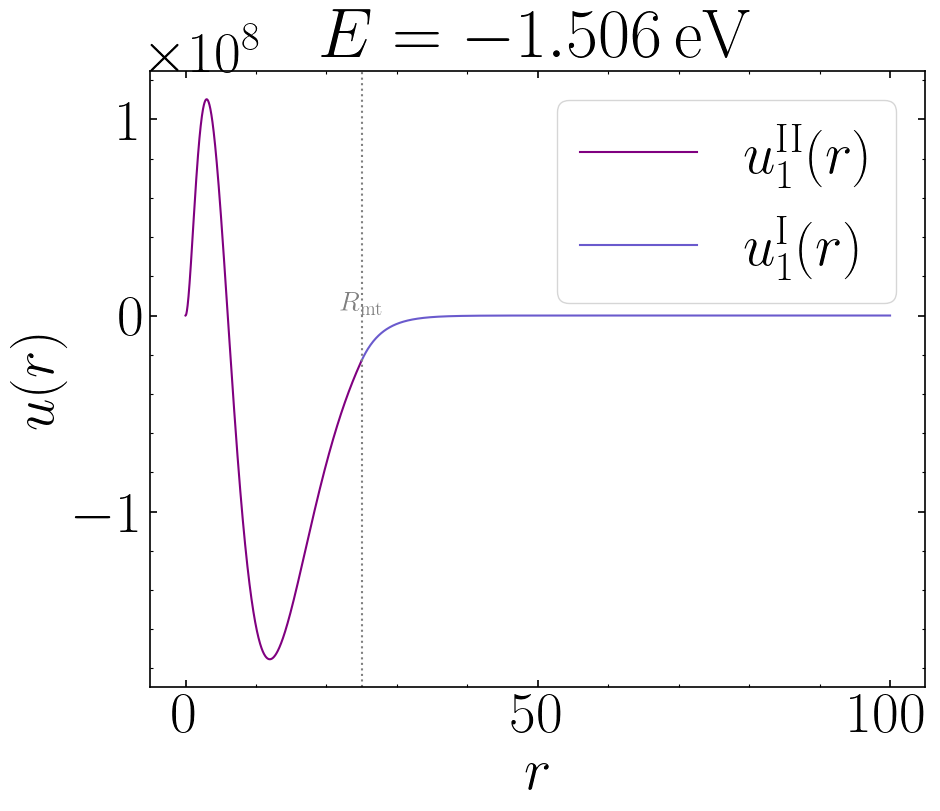

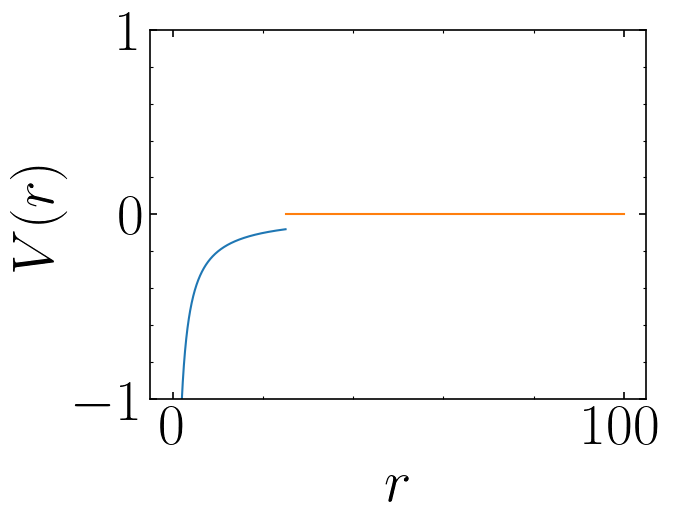

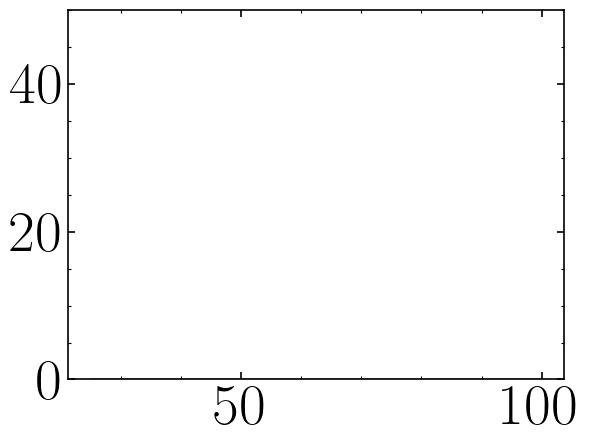

In [92]:
plt.style.use("~/.matplotlib/styles/style.mplstyle")



def plotting(E_best,l, boundary_conditions, r_min, R,
                           r_extend=80, r_num=1000):
    plt.figure(figsize=(10, 8))
    # Inside solution
    r_in, u_in, up_in = schrod_int(E_best, l, boundary_conditions, r_min, R, r_num)

    # Outside solution
    r_out = np.linspace(R, r_extend, r_num)
    k = np.sqrt(E_best + 0j)
    k=np.abs(k)
    
    print(k,'here')
    hankel_vals, _ = spherical_hankel(l, r_out, k)
    hankel_vals_new =  hankel_vals

    # Combine the radius arrays
    r_full = np.concatenate((r_in, r_out[1:]))  # avoid repeating R
    
    # Combine the corresponding u(r) arrays
    u_full = np.concatenate((u_in, hankel_vals[1:]))

    # Now plot the full solution in black dotted line
    print(u_in.real[-1],hankel_vals_new.real[0])
    A=u_in.real[-1]/hankel_vals_new.real[0]
    print(A,'hereA')
 
    # plt.plot(r_full, u_full.real, '-', label=rf"$u_{{{l}}}^{{\rm All}}(r)_{{E={E_best*13.6:.3f}\,\rm eV}}$", linewidth=10, color='maroon', alpha=0.2)
    # If you also want to show them separately:

    plt.plot(r_in,u_in.real,label=fr"$u_{{{l}}}^{{\rm II}}(r)$",color='purple')

    plt.plot(r_out, A*hankel_vals_new.real, label=fr"$u_{{{l}}}^{{\rm I}}(r)$",color='slateblue')
    plt.text(R, 0, r'$R_{\rm mt}$', ha='center', va='bottom', color='gray',size=20)
    # plt.ylim(-5, None) 

    plt.axvline(R, color='gray', linestyle=':')

    plt.xlabel(r"$r$")
    plt.ylabel(r"$u(r)$")
    plt.title(label=rf"${{E={E_best*13.6:.3f}\,\rm eV}}$")
    plt.legend(loc='upper right')
    plt.savefig("l10.pdf",bbox_inches='tight')
    
    # plt.ylim(-100,100)

    # plt.xlim(0,40)

    # plt.tight_layout()
    plt.show()

    plt.plot(r_in,potential(r_in,R))
    plt.plot(r_out, [0]*len(r_out))
    plt.xlabel(r"$r$")
    plt.ylabel(r"$V(r)$")

    plt.ylim(-1,1)
    plt.show()

    plt.plot(r_out, hankel_vals.real, label=fr"$u_{{{l}}}^{{\rm I}}(r)$",color='slateblue')
    plt.ylim(0,50)

    plt.show()



if __name__ == "__main__":
    l = 1
    bc = [1e-8, (l+1)*1e-8**(l)]
    r_min = 1e-8
    R =25
    
    E_guess = -.111011
    E_best = solver(E_guess, l, bc, r_min, R)

    print(E_best,'ebest')
    # print(f"best E = {E_best * 13.6:.6f} eV")
    # print(f"best A = {A_best:.6f}")

    plotting(E_best, l, bc, r_min, R, r_extend=100.0)


/Users/ekrakovs/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


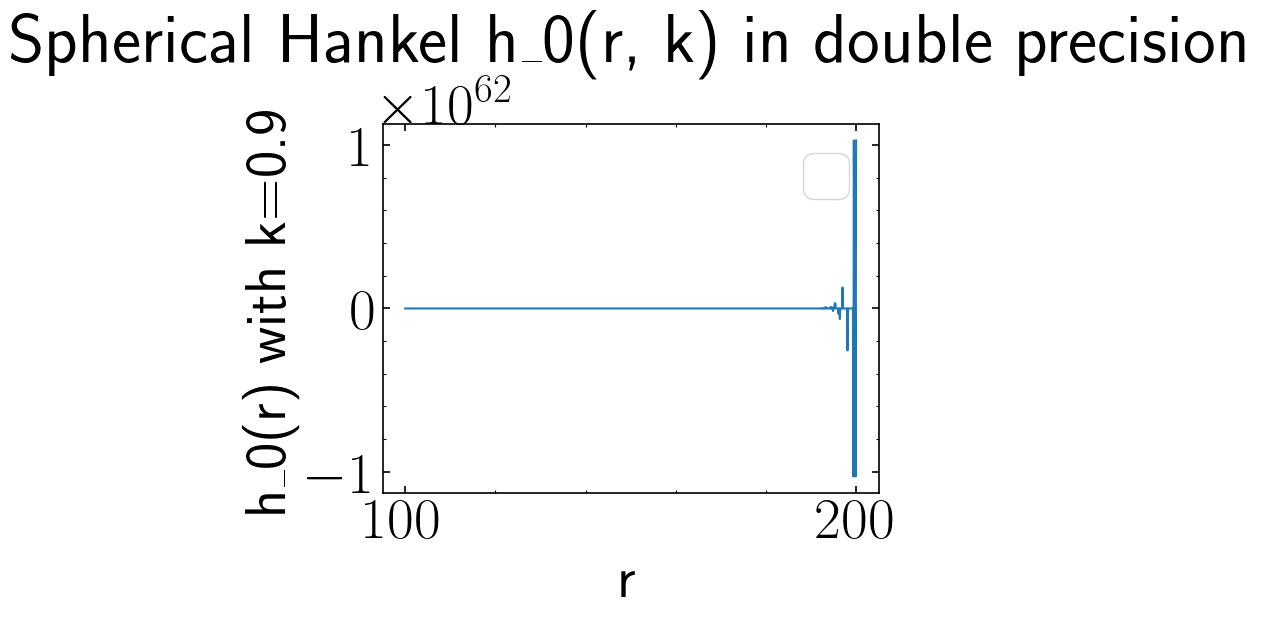

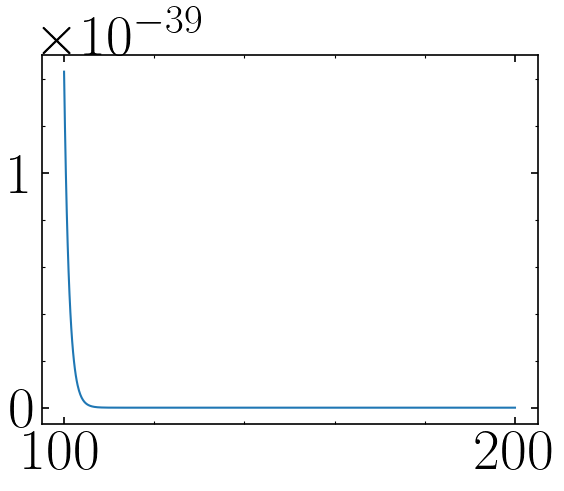

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import spherical_jn, spherical_yn
from scipy.special import spherical_in, spherical_kn


def spherical_hankel(l, r, k):
    """
    Spherical Hankel function h_l(r, k) as:
       h_l(r, k) = -i * [r * j_l(k*r) + i * r * y_l(k*r)] * (i)^(l+1)
    """
    # Explicitly convert inputs to desired precision:
    r_64 = np.float64(r)       # enforce float64
    k_128 =np.complex128(k)   # enforce complex128

    j_val = spherical_in(l, k_128 * r_64)*(1j)**l 
    y_val = r_64*spherical_kn(l, k_128 * r_64)

    # return -1 * (j_val + 1j * y_val) * (1j ** l)

    return y_val

def hankelfull(l,k,r):
    j = r*spherical_jn(l, r*k)
    y = r*spherical_yn(l, r*k)
    h= -1*(j + 1j*y)*1j**(l)
    return h
    
# Parameters
l = 0
k2 = np.complex128(0.9j)    # purely imaginary wave number, complex128
r_min, r_max = 100, 200
num_points = 1000

# Parameters
l = 0
# k = np.complex128(0.3j)      # purely imaginary wave number
k=.9
r_min, r_max =100, 200     # start the radial range at r=2.5
num_points = 1000             # reduce or adjust as needed

# Create a radial array
r_vals = np.linspace(r_min, r_max, num_points, dtype=np.float64)

plt.plot(r_vals,hankelfull(l,k2,r_vals))


# Create a radial array in float64
# r_vals = np.linspace(r_min, r_max, num_points, dtype=np.float64)

# # Evaluate h_l for each r, store as complex128
# h_vals = np.array([spherical_hankel(l, r, k) for r in r_vals], dtype=np.complex128)

# Plot real and imaginary parts
# plt.plot(r_vals, h_vals.real, label='Real part')
# plt.plot(r_vals, h_vals.imag, label='Imag part')
plt.xlabel('r')
plt.ylabel(f'h_{l}(r) with k={k}')
plt.title(f'Spherical Hankel h_{l}(r, k) in double precision')
plt.legend()
plt.show()

plt.plot(r_vals,spherical_hankel(0,r_vals,k))
plt.show()

